# EDA (Exploratory Data Analysis)
Voy a importar los datos directamente al Notebook usando la librería de Yahoo Finance.
Se usarán diferentes Cryptomonedas que yo escogí por su relevancia en el mercado.

In [152]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [153]:
btc = yf.download("BTC-USD", start = "2021-01-01")
btc

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-01,28994.009766,29600.626953,28803.585938,29374.152344,29374.152344,40730301359
2021-01-02,29376.455078,33155.117188,29091.181641,32127.267578,32127.267578,67865420765
2021-01-03,32129.408203,34608.558594,32052.316406,32782.023438,32782.023438,78665235202
2021-01-04,32810.949219,33440.218750,28722.755859,31971.914062,31971.914062,81163475344
2021-01-05,31977.041016,34437.589844,30221.187500,33992.429688,33992.429688,67547324782
...,...,...,...,...,...,...
2024-05-26,69264.289062,69506.226562,68183.890625,68518.093750,68518.093750,15628433737
2024-05-27,68512.179688,70597.882812,68232.500000,69394.554688,69394.554688,25870990717
2024-05-28,69392.195312,69514.640625,67227.156250,68296.218750,68296.218750,32722265965


In [154]:
eth = yf.download("ETH-USD", start = "2021-01-01")
eth

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-01,737.708374,749.201843,719.792236,730.367554,730.367554,13652004358
2021-01-02,730.402649,786.798462,718.109497,774.534973,774.534973,19740771179
2021-01-03,774.511841,1006.565002,771.561646,975.507690,975.507690,45200463368
2021-01-04,977.058838,1153.189209,912.305359,1040.233032,1040.233032,56945985763
2021-01-05,1041.498779,1129.371460,986.811279,1100.006104,1100.006104,41535932781
...,...,...,...,...,...,...
2024-05-26,3749.179932,3879.470703,3732.022949,3825.897461,3825.897461,14650794791
2024-05-27,3826.127197,3973.556396,3821.930420,3892.006836,3892.006836,18949181813
2024-05-28,3892.096924,3924.895752,3771.213867,3840.256348,3840.256348,19846044324


In [155]:
ada = yf.download("ADA-USD", start = "2021-01-01")
ada

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-01,0.181382,0.184246,0.172022,0.175350,0.175350,1122218004
2021-01-02,0.175359,0.184253,0.169233,0.177423,0.177423,1408849504
2021-01-03,0.177382,0.208679,0.173376,0.204995,0.204995,2303857909
2021-01-04,0.205236,0.239661,0.194450,0.224762,0.224762,3260699086
2021-01-05,0.224817,0.264886,0.208454,0.258314,0.258314,4097207384
...,...,...,...,...,...,...
2024-05-26,0.462072,0.462364,0.456430,0.458375,0.458375,225636000
2024-05-27,0.458375,0.473999,0.457198,0.467963,0.467963,323304261
2024-05-28,0.467963,0.468437,0.453115,0.456990,0.456990,418594476


In [156]:
sol = yf.download("SOL-USD", start = "2021-01-01")
sol

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-01,1.509775,1.859656,1.502038,1.842084,1.842084,25722549
2021-01-02,1.845586,1.989295,1.721482,1.799275,1.799275,31671064
2021-01-03,1.799902,2.364981,1.799902,2.161752,2.161752,55073422
2021-01-04,2.162412,2.485097,1.876342,2.485097,2.485097,59955405
2021-01-05,2.490982,2.502616,2.077742,2.157217,2.157217,50555207
...,...,...,...,...,...,...
2024-05-26,168.437637,168.439270,161.263870,163.350906,163.350906,2543881488
2024-05-27,163.350906,171.988541,163.335449,169.996140,169.996140,2745440475
2024-05-28,169.996140,173.017136,164.973404,168.650848,168.650848,3342283019


In [157]:
#Por la naturaleza de los datos no tendremos N/a
btc.isnull().sum()
eth.isnull().sum()
ada.isnull().sum()
sol.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

En cuanto a tipos de datos, datos faltantes o categóricos/numéricos no habrá mayor problemas puesto que tenemos únicamente datos numéricos completos.

# Correlación 
Por naturaleza, Bitcoin es la cryptomoneda más mediática y de cierta forma el principal pilar del mercado, por ello vale la pena analizar que tan fuerte es su correlación con las demás cryptos seleccionadas. Pasaremos cada crypto en cuestión a su porcentaje de cambio en el precio respecto al día anterior para analizar mejor las correlaciones.


Usaremos únicamente el precio al final del día, i.e. la columna 'Close'

In [158]:
btc = btc['Close'] 
btc_percent = 100*(btc.pct_change())
btc_percent = btc_percent.dropna()

In [159]:
eth = eth['Close']
eth_percent = 100*(eth.pct_change())
eth_percent = eth_percent.dropna()

In [160]:
ada = ada['Close']
ada_percent = 100*(ada.pct_change())
ada_percent = ada_percent.dropna()

In [161]:
sol = sol['Close']
sol_percent = 100*(sol.pct_change())
sol_percent = sol_percent.dropna()

In [162]:
print('Correlación BTC - ETH:' , btc.corr(eth))
print('Correlación BTC - ADA:' , btc.corr(ada))
print('Correlación BTC - SOL:' , btc.corr(sol))

Correlación BTC - ETH: 0.8071638144411664
Correlación BTC - ADA: 0.5352647300966392
Correlación BTC - SOL: 0.7256445299359796


In [163]:
print('Correlación ETH - ADA:' , eth.corr(ada))
print('Correlación ETH - SOL:' , eth.corr(sol))

Correlación ETH - ADA: 0.6887422396787827
Correlación ETH - SOL: 0.8948506211375756


In [164]:
print('Correlación BTC% - ETH%:' , btc_percent.corr(eth_percent))
print('Correlación BTC% - ADA%:' , btc_percent.corr(ada_percent))
print('Correlación BTC% - SOL%:' , btc_percent.corr(sol_percent))

Correlación BTC% - ETH%: 0.8113030939179064
Correlación BTC% - ADA%: 0.6552210863056507
Correlación BTC% - SOL%: 0.5674386397329362


In [165]:
print('Correlación ETH% - ADA%:' , eth_percent.corr(ada_percent))
print('Correlación ETH% - SOL%:' , eth_percent.corr(sol_percent))

Correlación ETH% - ADA%: 0.6812383455812692
Correlación ETH% - SOL%: 0.6182762510691565


Se obtuvieron buenos valores de correlación, basándome en conocimiento teórico, como hipótesis me planteé alimentar a mi red de una matriz de 4 columnas, una por cada crypto, pero no obtuve los resultados esperados, por lo que alimentaré cada crypto a la red individualmente.

# Gráficas

<Axes: xlabel='Date'>

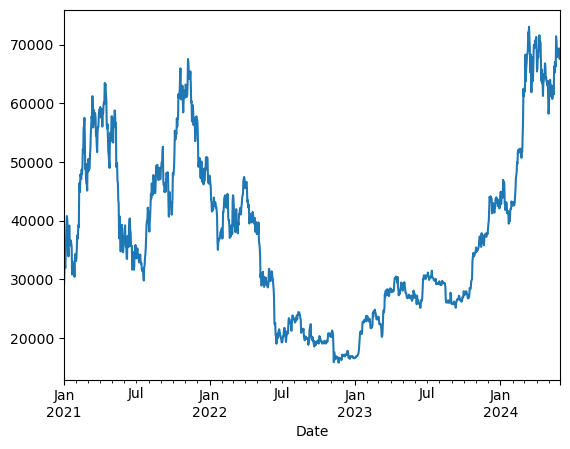

In [166]:
btc.plot()

<Axes: xlabel='Date'>

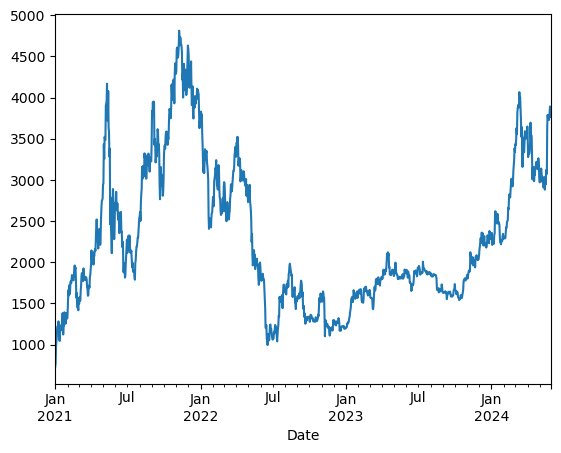

In [167]:
eth.plot()

<Axes: xlabel='Date'>

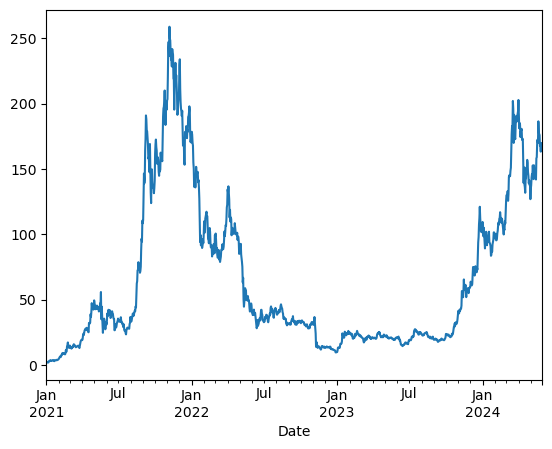

In [168]:
sol.plot()

<Axes: xlabel='Date'>

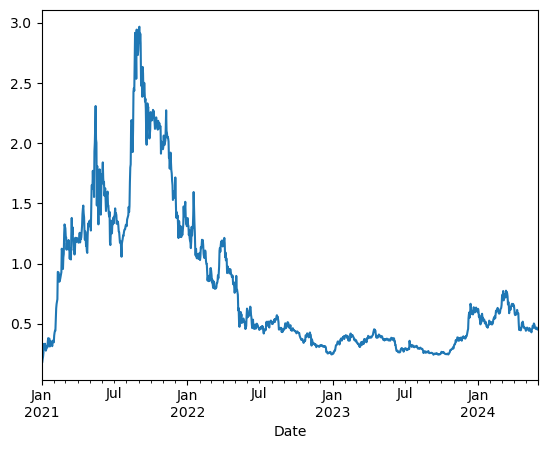

In [169]:
ada.plot()

<Axes: xlabel='Date'>

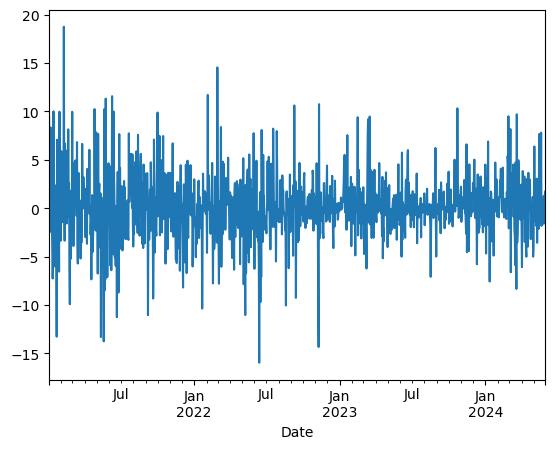

In [170]:
btc_percent.plot()

<Axes: xlabel='Date'>

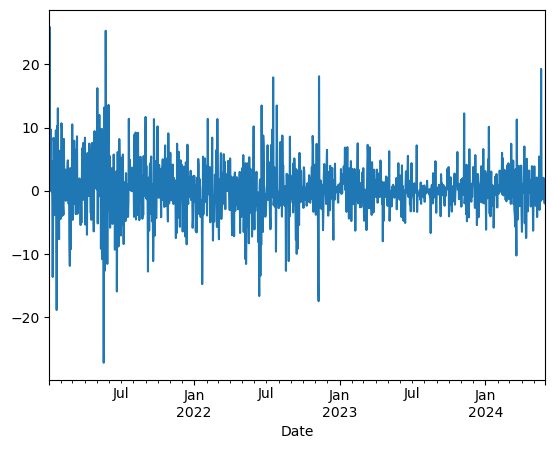

In [171]:
eth_percent.plot()

<Axes: xlabel='Date'>

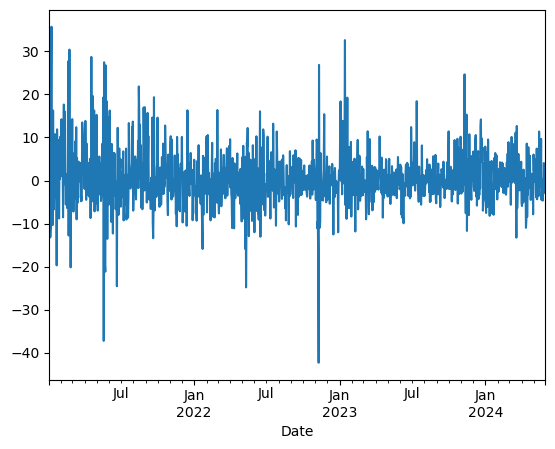

In [172]:
sol_percent.plot()

<Axes: xlabel='Date'>

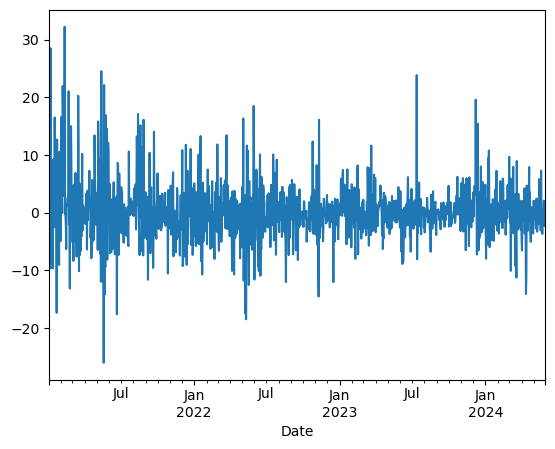

In [173]:
ada_percent.plot()

# Preprocesamiento de Datos

In [174]:
# Escogemos las fechas para el entrenamiento
start_training = dt.datetime(2021, 1, 1)
end_training = dt.datetime.now() - dt.timedelta(days=120)

# Escogemos las fechas para el test
start_testing = end_training
end_testing = dt.datetime.now()

prior_days = 120 # Número de días previos a predecir

In [175]:
crypto = yf.download(f'BTC-USD', start=start_training, end=end_training)
crypto_training = crypto.iloc[:, 3:4].values
print(crypto_training)

[*********************100%%**********************]  1 of 1 completed
[[29374.15234375]
 [32127.26757812]
 [32782.0234375 ]
 ...
 [43288.24609375]
 [42952.609375  ]
 [42582.60546875]]


In [176]:
print(crypto_training.shape)

(1126, 1)


In [177]:
scaler = MinMaxScaler(feature_range = (0, 1))
crypto_training_scaled = scaler.fit_transform(crypto_training)
print(crypto_training_scaled)

[[0.26239837]
 [0.31556831]
 [0.32821338]
 ...
 [0.53111634]
 [0.52463431]
 [0.51748855]]


In [178]:
# Separar los datos de entrenamiento:
X_train = []
y_train = []
for i in range(prior_days, len(crypto_training_scaled)):        # prior_days son dias previos que usaremos para la predicción
    X_train.append(crypto_training_scaled[i-prior_days:i, 0])   # Tomamos los valores de los prior_days anteriores 
    y_train.append(crypto_training_scaled[i, 0])                # Tomamos el valor del siguiente día
X_train, y_train = np.array(X_train), np.array(y_train)         # Convertimos a numpy arrays para facilitar su manejo

print("Shape de X_train: ", X_train.shape)
print("Shape de y_train: ", y_train.shape)

Shape de X_train:  (1006, 120)
Shape de y_train:  (1006,)


In [179]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1)) # Se añade una columna del sesgo
print("Shape de X_train después del reshape: ", X_train.shape)

Shape de X_train después del reshape:  (1006, 120, 1)


In [180]:
crypto_test = yf.download(f'BTC-USD', start=start_testing, end=end_testing)
real_crypto = crypto_test.iloc[:, 3:4].values
print(real_crypto.shape)

[*********************100%%**********************]  1 of 1 completed
(120, 1)


In [181]:
crypto_total = pd.concat((crypto['Close'], crypto_test['Close']), axis = 0)         # Concatenamos el precio real de la crypto en el periodo de entrenamiento y prueba
inputs = crypto_total[len(crypto_total) - len(crypto_test) - prior_days:].values    # Tomamos los valores de la crypto en el periodo de prueba
print(inputs)

[27799.39453125 27415.91210938 27946.59765625 27968.83984375
 27935.08984375 27583.67773438 27391.01953125 26873.3203125
 26756.79882812 26862.375      26861.70703125 27159.65234375
 28519.46679688 28415.74804688 28328.34179688 28719.80664062
 29682.94921875 29918.41210938 29993.89648438 33086.234375
 33901.52734375 34502.8203125  34156.6484375  33909.80078125
 34089.57421875 34538.48046875 34502.36328125 34667.78125
 35437.25390625 34938.2421875  34732.32421875 35082.1953125
 35049.35546875 35037.37109375 35443.5625     35655.27734375
 36693.125      37313.96875    37138.05078125 37054.51953125
 36502.35546875 35537.640625   37880.58203125 36154.76953125
 36596.68359375 36585.703125   37386.546875   37476.95703125
 35813.8125     37432.33984375 37289.62109375 37720.28125
 37796.79296875 37479.12109375 37254.16796875 37831.0859375
 37858.4921875  37712.74609375 38688.75       39476.33203125
 39978.390625   41980.09765625 44080.6484375  43746.4453125
 43292.6640625  44166.6015625  43725

In [182]:
print("Shape de los inputs:", inputs.shape)

Shape de los inputs: (240,)


In [183]:
inputs = inputs.reshape(-1,1) # Convertimos los valores en un arreglo de una sola columna
print("Shape de los inputs después del reshape:", inputs.shape)

Shape de los inputs después del reshape: (240, 1)


In [184]:
print(inputs)

[[27799.39453125]
 [27415.91210938]
 [27946.59765625]
 [27968.83984375]
 [27935.08984375]
 [27583.67773438]
 [27391.01953125]
 [26873.3203125 ]
 [26756.79882812]
 [26862.375     ]
 [26861.70703125]
 [27159.65234375]
 [28519.46679688]
 [28415.74804688]
 [28328.34179688]
 [28719.80664062]
 [29682.94921875]
 [29918.41210938]
 [29993.89648438]
 [33086.234375  ]
 [33901.52734375]
 [34502.8203125 ]
 [34156.6484375 ]
 [33909.80078125]
 [34089.57421875]
 [34538.48046875]
 [34502.36328125]
 [34667.78125   ]
 [35437.25390625]
 [34938.2421875 ]
 [34732.32421875]
 [35082.1953125 ]
 [35049.35546875]
 [35037.37109375]
 [35443.5625    ]
 [35655.27734375]
 [36693.125     ]
 [37313.96875   ]
 [37138.05078125]
 [37054.51953125]
 [36502.35546875]
 [35537.640625  ]
 [37880.58203125]
 [36154.76953125]
 [36596.68359375]
 [36585.703125  ]
 [37386.546875  ]
 [37476.95703125]
 [35813.8125    ]
 [37432.33984375]
 [37289.62109375]
 [37720.28125   ]
 [37796.79296875]
 [37479.12109375]
 [37254.16796875]
 [37831.08

In [185]:
# Análogamente, escalamos los datos con MinMaxScaler que usamos para los datos de entrenamiento
inputs = scaler.transform(inputs)
print(inputs)

[[0.23198563]
 [0.22457957]
 [0.23482852]
 [0.23525807]
 [0.23460627]
 [0.22781957]
 [0.22409883]
 [0.21410069]
 [0.21185035]
 [0.21388931]
 [0.21387641]
 [0.21963052]
 [0.24589214]
 [0.24388905]
 [0.24220101]
 [0.24976123]
 [0.26836206]
 [0.27290947]
 [0.27436727]
 [0.3340885 ]
 [0.34983396]
 [0.36144652]
 [0.35476103]
 [0.34999375]
 [0.35346565]
 [0.36213522]
 [0.3614377 ]
 [0.36463236]
 [0.37949291]
 [0.36985567]
 [0.36587885]
 [0.37263579]
 [0.37200156]
 [0.37177011]
 [0.37961474]
 [0.38370352]
 [0.4037471 ]
 [0.41573724]
 [0.4123398 ]
 [0.41072659]
 [0.40006284]
 [0.38143164]
 [0.42668004]
 [0.39335003]
 [0.40188456]
 [0.4016725 ]
 [0.41713891]
 [0.41888497]
 [0.38676525]
 [0.4180233 ]
 [0.41526702]
 [0.42358421]
 [0.42506185]
 [0.41892677]
 [0.41458233]
 [0.42572414]
 [0.42625343]
 [0.42343868]
 [0.4422879 ]
 [0.45749819]
 [0.46719427]
 [0.50585253]
 [0.54641973]
 [0.53996538]
 [0.53120166]
 [0.54807971]
 [0.53957023]
 [0.5406076 ]
 [0.4916333 ]
 [0.49561924]
 [0.52343949]
 [0.52

In [186]:
X_test, y_test = [], []
for i in range(prior_days, prior_days + len(real_crypto)):  # Tomamos los valores de la crypto en el periodo de prueba
    X_test.append(inputs[i-prior_days:i, 0])                # Tomamos los valores de los 120 días previos
    y_test.append(inputs[i, 0])                             # Tomamos el valor real de la crypto en el día i
    
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))      # Añadimos una columna del sesgo

print("Shape de X_test: ", X_test.shape)
print("Shape de y_test: ", len(y_test))

Shape de X_test:  (120, 120, 1)
Shape de y_test:  120


# Entrenamiento
Usaré una arquitectura que se expone su efectividad en el artículo "Forecasting stock market price using LSTM-RNN" https://ieeexplore.ieee.org/document/9823818
Una red de tres capas con 50 neuronas cada una y una única neurona de salida.

Recursos que utilicé:

Secuencial(): Configura el modelo secuencial donde puedes agregar capas en orden.

Capas LSTM y Dropout: Apila 3 capas LSTM con dropout de 20% para evitar sobreajuste.

Capa Dense: Se utiliza para producir la predicción final con una única neurona.

Compile: Especifica el optimizador Adam y la función de pérdida Mean Squared Error.

Fit: Ajusta el modelo a los datos de entrenamiento, cuántas epochs y el batch_size.


In [187]:
def train_model(X_train, y_train):
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
    model.add(Dropout(0.2))
    model.add(LSTM(units=50, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(units=50))
    model.add(Dropout(0.2))
    model.add(Dense(units=1))
    
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X_train, y_train, epochs=100, batch_size=16)
    
    return model

In [188]:
model = train_model(X_train, y_train)
prediction_prices = model.predict(X_test)
prediction_prices = scaler.inverse_transform(prediction_prices)

Epoch 1/100
63/63 [==============================] - 4s 40ms/step - loss: 0.0183
Epoch 2/100
63/63 [==============================] - 2s 39ms/step - loss: 0.0064
Epoch 3/100
63/63 [==============================] - 2s 39ms/step - loss: 0.0050
Epoch 4/100
63/63 [==============================] - 2s 39ms/step - loss: 0.0054
Epoch 5/100
63/63 [==============================] - 2s 39ms/step - loss: 0.0047
Epoch 6/100
63/63 [==============================] - 2s 39ms/step - loss: 0.0048
Epoch 7/100
63/63 [==============================] - 2s 39ms/step - loss: 0.0042
Epoch 8/100
63/63 [==============================] - 2s 39ms/step - loss: 0.0038
Epoch 9/100
63/63 [==============================] - 2s 39ms/step - loss: 0.0039
Epoch 10/100
63/63 [==============================] - 2s 39ms/step - loss: 0.0033
Epoch 11/100
63/63 [==============================] - 2s 39ms/step - loss: 0.0034
Epoch 12/100
63/63 [==============================] - 2s 39ms/step - loss: 0.0031
Epoch 13/100
63/63 [=====

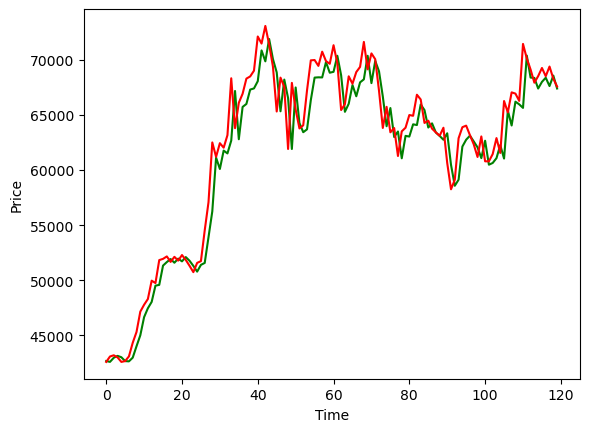

In [189]:
plt.plot(prediction_prices, color='green', label='Predicted Prices')
plt.plot(real_crypto, color='red', label='Real Prices')

print("Error cuadrático medio:", mean_squared_error(real_crypto, prediction_prices))

plt.xlabel("Time")
plt.ylabel("Price")
plt.show()

In [190]:
# Predicción a días futuros
real_data = [inputs[len(inputs) + 1 - prior_days:len(inputs+1), 0]] # Tomamos los valores de los 120 días previos
real_data = np.array(real_data)
print(real_data)

[[0.52701293 0.52913898 0.52539987 0.51750741 0.51895752 0.52718478
  0.55100791 0.56999888 0.60564294 0.61769554 0.62778911 0.65993124
  0.65576393 0.69601639 0.69817669 0.70245731 0.69285492 0.70173006
  0.69509806 0.70486505 0.69625749 0.68594054 0.67487394 0.6910802
  0.69421149 0.74807762 0.79757533 0.90223863 0.87700847 0.9009996
  0.89306626 0.91503484 1.01474686 0.92727574 0.97180308 0.98761396
  1.0141613  1.01800044 1.02806052 1.08800924 1.0755986  1.10654153
  1.07396291 1.03547627 0.9565135  1.0159097  0.99964785 0.89080524
  1.00669847 0.95991781 0.92684241 0.93231642 0.99357553 1.04619555
  1.04675607 1.03647223 1.061378   1.04492121 1.04014088 1.07274727
  1.04123869 0.95905998 0.96936984 1.01819281 1.00523011 1.02567194
  1.03468023 1.07849685 1.0303631  1.05834456 1.04816151 0.99283576
  0.92766728 0.96469452 0.92003373 0.92748169 0.87852082 0.9217051
  0.92809404 0.95032041 0.94901107 0.98591821 0.97760593 0.93646275
  0.94041815 0.9263897  0.91989718 0.91398925 0.928

In [191]:
future_days_predicted = 3
prediction = []
for _ in range(future_days_predicted): 
    prediction_vector = np.reshape(real_data, (real_data.shape[0], real_data.shape[1], 1)) # Añadimos una columna del sesgo
    next_day = model.predict(prediction_vector)                                                   # Predecimos el siguiente día
    price = scaler.inverse_transform(next_day)                                     # Se aplica la transformación inversa
    prediction.append(price[0][0])                                          # Se añade el precio a la lista de predicciones
    n_real_data = []
    for j in range(1, len(real_data[0])):                                   # Se actualizan los valores de los 120 días previos
        n_real_data.append([real_data[0][j]]) 
    n_real_data.append(next_day[0])                                                # Se añade el valor predicho
    n_real_data = np.array(n_real_data)
    n_real_data = np.transpose(n_real_data)                                # Se transpone para que tenga la misma forma que real_data
    real_data = n_real_data

1/1 [==============================] - 0s 11ms/step


In [192]:
prediction = np.array(prediction)
prediction = np.reshape(prediction, (len(prediction), 1))
prediction_btc = prediction
print("Precios de cierre para los próximos 3 días:")
print("Precio para", end_testing + dt.timedelta(days=1), prediction[0])
print("Precio para", end_testing + dt.timedelta(days=2), prediction[1])
print("Precio para", end_testing + dt.timedelta(days=3), prediction[2])


Precios de cierre para los próximos 3 días:
Precio para 2024-05-31 13:48:10.027893 [67000.18]
Precio para 2024-06-01 13:48:10.027893 [66452.69]
Precio para 2024-06-02 13:48:10.027893 [65927.41]


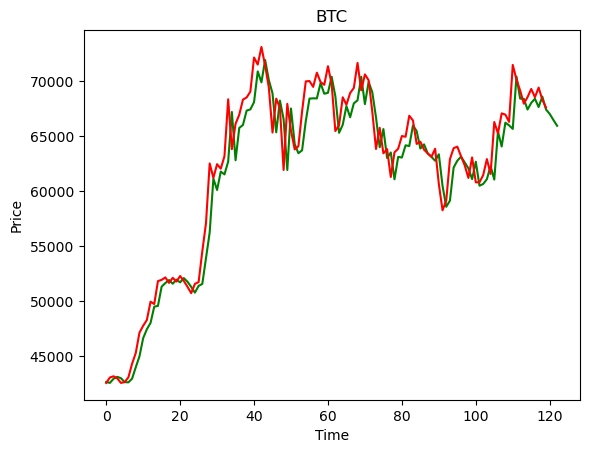

In [193]:
final_prediction_prices= prediction_prices
final_prediction_prices = np.row_stack((final_prediction_prices, prediction))

plt.plot(final_prediction_prices, color='green', label='Predicted Prices')
plt.plot(real_crypto, color='red', label='Real Prices')
plt.title("BTC")
plt.xlabel("Time")
plt.ylabel("Price")
plt.show()

Ya que se explicó el proceso y se vio paso a paso el procesamiento de nuestros datos, usaré el mismo método para las demás cryptomonedas.

In [194]:
crypto = yf.download(f'ETH-USD', start=start_training, end=end_training)
crypto_training = crypto.iloc[:, 3:4].values

crypto_training_scaled = scaler.fit_transform(crypto_training)

X_train = []
y_train = []
for i in range(prior_days, len(crypto_training_scaled)):
    X_train.append(crypto_training_scaled[i-prior_days:i, 0])
    y_train.append(crypto_training_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

crypto_test = yf.download(f'ETH-USD', start=start_testing, end=end_testing)
real_crypto = crypto_test.iloc[:, 3:4].values
crypto_total = pd.concat((crypto['Close'], crypto_test['Close']), axis=0)
inputs = crypto_total[len(crypto_total) - len(crypto_test) - prior_days:].values
inputs = inputs.reshape(-1, 1)
inputs = scaler.transform(inputs)

X_test, y_test = [], []
for i in range(prior_days, prior_days + len(real_crypto)):
    X_test.append(inputs[i-prior_days:i, 0])
    y_test.append(inputs[i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

def train_model(X_train, y_train):
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
    model.add(Dropout(0.2))
    model.add(LSTM(units=50, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(units=50))
    model.add(Dropout(0.2))
    model.add(Dense(units=1))
    
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X_train, y_train, epochs=100, batch_size=16)
    
    return model

model = train_model(X_train, y_train)

prediction_prices = model.predict(X_test)
prediction_prices = scaler.inverse_transform(prediction_prices)

real_data = inputs[len(inputs) - prior_days:len(inputs), 0]
real_data = np.array([real_data])

future_days = 3
prediction = []
for _ in range(future_days):
    prediction_vector = np.reshape(real_data, (real_data.shape[0], real_data.shape[1], 1))
    next_day = model.predict(prediction_vector)
    price = scaler.inverse_transform(next_day)
    prediction.append(price[0][0])
    n_real_data = []
    for j in range(1, len(real_data[0])):
        n_real_data.append([real_data[0][j]])
    n_real_data.append(next_day[0])
    n_real_data = np.array(n_real_data)
    n_real_data = np.transpose(n_real_data)
    real_data = n_real_data

prediction = np.array(prediction)
prediction = np.reshape(prediction, (len(prediction), 1))
prediction_eth = prediction

print("Precios de cierre para los próximos 3 días:")
print("Precio para", end_testing + dt.timedelta(days=1), prediction[0])
print("Precio para", end_testing + dt.timedelta(days=2), prediction[1])
print("Precio para", end_testing + dt.timedelta(days=3), prediction[2])

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
Epoch 1/100
63/63 [==============================] - 4s 36ms/step - loss: 0.0171
Epoch 2/100
63/63 [==============================] - 2s 37ms/step - loss: 0.0080
Epoch 3/100
63/63 [==============================] - 2s 38ms/step - loss: 0.0062
Epoch 4/100
63/63 [==============================] - 2s 38ms/step - loss: 0.0061
Epoch 5/100
63/63 [==============================] - 2s 38ms/step - loss: 0.0049
Epoch 6/100
63/63 [==============================] - 3s 40ms/step - loss: 0.0039
Epoch 7/100
63/63 [==============================] - 2s 39ms/step - loss: 0.0042
Epoch 8/100
63/63 [==============================] - 2s 40ms/step - loss: 0.0039
Epoch 9/100
63/63 [==============================] - 3s 41ms/step - loss: 0.0036
Epoch 10/100
63/63 [==============================] - 3s 41ms/step - loss: 0.0034
Epoch 11/100
63/63 [==============================]

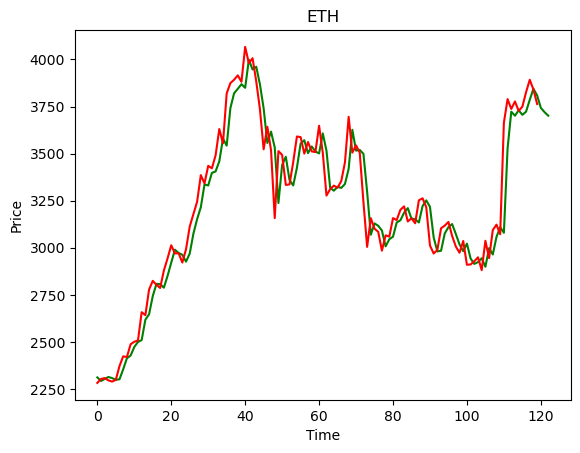

In [195]:
final_prediction_prices= prediction_prices
final_prediction_prices = np.row_stack((final_prediction_prices, prediction))

print("Error cuadrático medio:", mean_squared_error(real_crypto, prediction_prices))

plt.plot(final_prediction_prices, color='green', label='Predicted Prices')
plt.plot(real_crypto, color='red', label='Real Prices')
plt.title("ETH")
plt.xlabel("Time")
plt.ylabel("Price")
plt.show()

In [196]:
crypto = yf.download(f'SOL-USD', start=start_training, end=end_training)
crypto_training = crypto.iloc[:, 3:4].values

crypto_training_scaled = scaler.fit_transform(crypto_training)

X_train = []
y_train = []
for i in range(prior_days, len(crypto_training_scaled)):
    X_train.append(crypto_training_scaled[i-prior_days:i, 0])
    y_train.append(crypto_training_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

crypto_test = yf.download(f'SOL-USD', start=start_testing, end=end_testing)
real_crypto = crypto_test.iloc[:, 3:4].values
crypto_total = pd.concat((crypto['Close'], crypto_test['Close']), axis=0)
inputs = crypto_total[len(crypto_total) - len(crypto_test) - prior_days:].values
inputs = inputs.reshape(-1, 1)
inputs = scaler.transform(inputs)

X_test, y_test = [], []
for i in range(prior_days, prior_days + len(real_crypto)):
    X_test.append(inputs[i-prior_days:i, 0])
    y_test.append(inputs[i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

def train_model(X_train, y_train):
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
    model.add(Dropout(0.2))
    model.add(LSTM(units=50, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(units=50))
    model.add(Dropout(0.2))
    model.add(Dense(units=1))
    
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X_train, y_train, epochs=100, batch_size=16)
    
    return model

model = train_model(X_train, y_train)

prediction_prices = model.predict(X_test)
prediction_prices = scaler.inverse_transform(prediction_prices)

real_data = inputs[len(inputs) - prior_days:len(inputs), 0]
real_data = np.array([real_data])

future_days = 3
prediction = []
for _ in range(future_days):
    rd = np.reshape(real_data, (real_data.shape[0], real_data.shape[1], 1))
    t = model.predict(rd)
    price = scaler.inverse_transform(t)
    prediction.append(price[0][0])
    n_real_data = []
    for j in range(1, len(real_data[0])):
        n_real_data.append([real_data[0][j]])
    n_real_data.append(t[0])
    n_real_data = np.array(n_real_data)
    n_real_data = np.transpose(n_real_data)
    real_data = n_real_data

prediction = np.array(prediction)
prediction = np.reshape(prediction, (len(prediction), 1))
prediction_sol = prediction

print("Precios de cierre para los próximos 3 días:")
print("Precio para", end_testing + dt.timedelta(days=1), prediction[0])
print("Precio para", end_testing + dt.timedelta(days=2), prediction[1])
print("Precio para", end_testing + dt.timedelta(days=3), prediction[2])

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
Epoch 1/100
63/63 [==============================] - 4s 37ms/step - loss: 0.0116
Epoch 2/100
63/63 [==============================] - 2s 38ms/step - loss: 0.0052
Epoch 3/100
63/63 [==============================] - 2s 39ms/step - loss: 0.0038
Epoch 4/100
63/63 [==============================] - 2s 39ms/step - loss: 0.0036
Epoch 5/100
63/63 [==============================] - 2s 39ms/step - loss: 0.0034
Epoch 6/100
63/63 [==============================] - 2s 39ms/step - loss: 0.0032
Epoch 7/100
63/63 [==============================] - 2s 39ms/step - loss: 0.0031
Epoch 8/100
63/63 [==============================] - 2s 39ms/step - loss: 0.0027
Epoch 9/100
63/63 [==============================] - 2s 39ms/step - loss: 0.0027
Epoch 10/100
63/63 [==============================] - 2s 39ms/step - loss: 0.0026
Epoch 11/100
63/63 [==============================]

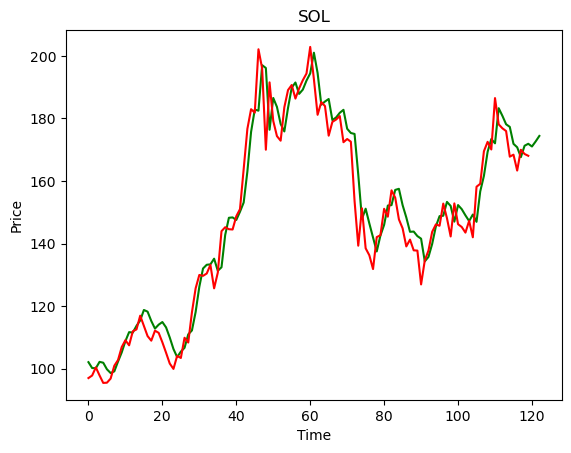

In [197]:
final_prediction_prices= prediction_prices
final_prediction_prices = np.row_stack((final_prediction_prices, prediction))

print("Error cuadrático medio:", mean_squared_error(real_crypto, prediction_prices))

plt.plot(final_prediction_prices, color='green', label='Predicted Prices')
plt.plot(real_crypto, color='red', label='Real Prices')
plt.title("SOL")
plt.xlabel("Time")
plt.ylabel("Price")
plt.show()

In [227]:
crypto = yf.download(f'ADA-USD', start=start_training, end=end_training)
crypto_training = crypto.iloc[:, 3:4].values

crypto_training_scaled = scaler.fit_transform(crypto_training)

X_train = []
y_train = []
for i in range(prior_days, len(crypto_training_scaled)):
    X_train.append(crypto_training_scaled[i-prior_days:i, 0])
    y_train.append(crypto_training_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

crypto_test = yf.download(f'ADA-USD', start=start_testing, end=end_testing)
real_crypto = crypto_test.iloc[:, 3:4].values
crypto_total = pd.concat((crypto['Close'], crypto_test['Close']), axis=0)
inputs = crypto_total[len(crypto_total) - len(crypto_test) - prior_days:].values
inputs = inputs.reshape(-1, 1)
inputs = scaler.transform(inputs)

X_test, y_test = [], []
for i in range(prior_days, prior_days + len(real_crypto)):
    X_test.append(inputs[i-prior_days:i, 0])
    y_test.append(inputs[i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

def train_model(X_train, y_train):
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
    model.add(Dropout(0.2))
    model.add(LSTM(units=50, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(units=50))
    model.add(Dropout(0.2))
    model.add(Dense(units=1))
    
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X_train, y_train, epochs=100, batch_size=16)
    
    return model

model = train_model(X_train, y_train)

prediction_prices = model.predict(X_test)
prediction_prices = scaler.inverse_transform(prediction_prices)

real_data = inputs[len(inputs) - prior_days:len(inputs), 0]
real_data = np.array([real_data])

future_days = 3
prediction = []
for _ in range(future_days):
    prediction_vector = np.reshape(real_data, (real_data.shape[0], real_data.shape[1], 1))
    next_day = model.predict(prediction_vector)
    price = scaler.inverse_transform(next_day)
    prediction.append(price[0][0])
    n_real_data = []
    for j in range(1, len(real_data[0])):
        n_real_data.append([real_data[0][j]])
    n_real_data.append(next_day[0])
    n_real_data = np.array(n_real_data)
    n_real_data = np.transpose(n_real_data)
    real_data = n_real_data

prediction = np.array(prediction)
prediction = np.reshape(prediction, (len(prediction), 1))
prediction_ada = prediction

print("Precios de cierre para los próximos 3 días:")
print("Precio para", end_testing + dt.timedelta(days=1), prediction[0])
print("Precio para", end_testing + dt.timedelta(days=2), prediction[1])
print("Precio para", end_testing + dt.timedelta(days=3), prediction[2])

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
Epoch 1/100
63/63 [==============================] - 5s 38ms/step - loss: 0.0100
Epoch 2/100
63/63 [==============================] - 3s 40ms/step - loss: 0.0036
Epoch 3/100
63/63 [==============================] - 3s 40ms/step - loss: 0.0035
Epoch 4/100
63/63 [==============================] - 3s 44ms/step - loss: 0.0036
Epoch 5/100
63/63 [==============================] - 3s 40ms/step - loss: 0.0028
Epoch 6/100
63/63 [==============================] - 3s 40ms/step - loss: 0.0026
Epoch 7/100
63/63 [==============================] - 2s 39ms/step - loss: 0.0025
Epoch 8/100
63/63 [==============================] - 2s 39ms/step - loss: 0.0027
Epoch 9/100
63/63 [==============================] - 2s 39ms/step - loss: 0.0025
Epoch 10/100
63/63 [==============================] - 2s 39ms/step - loss: 0.0027
Epoch 11/100
63/63 [==============================]

Error cuadrático medio: 0.0007550874811974732


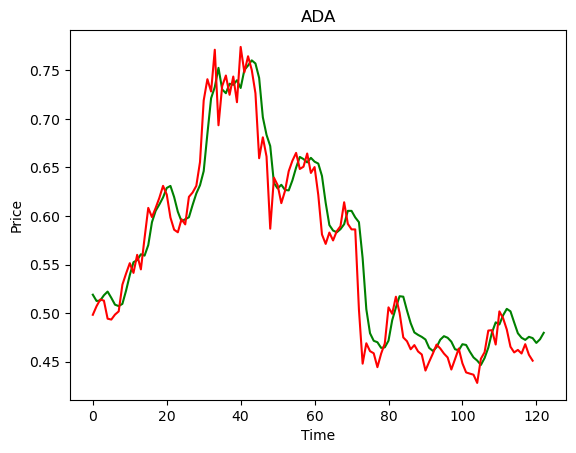

In [228]:
final_prediction_prices= prediction_prices
final_prediction_prices = np.row_stack((final_prediction_prices, prediction))

print("Error cuadrático medio:", mean_squared_error(real_crypto, prediction_prices))

plt.plot(final_prediction_prices, color='green', label='Predicted Prices')
plt.plot(real_crypto, color='red', label='Real Prices')
plt.title("ADA")
plt.xlabel("Time")
plt.ylabel("Price")
plt.show()

In [200]:
print('BTC:', prediction_btc)
print('ETH:', prediction_eth)
print('SOL:', prediction_sol)
print('ADA:', prediction_ada)

BTC: [[67000.18]
 [66452.69]
 [65927.41]]
ETH: [[3742.923 ]
 [3720.2021]
 [3701.42  ]]
SOL: [[171.04791]
 [172.66527]
 [174.42459]]
ADA: [[0.4467095 ]
 [0.44092524]
 [0.4349967 ]]


In [201]:
market_btc = pd.DataFrame(prediction_btc).pct_change()
market_btc.dropna(inplace=True)
market_btc = 100*np.array(market_btc)
print(market_btc)

[[-0.8171499]
 [-0.7904589]]


In [202]:
market_eth = pd.DataFrame(prediction_eth).pct_change()
market_eth.dropna(inplace=True)
market_eth = 100*np.array(market_eth)
print(market_eth)

[[-0.60703754]
 [-0.5048692 ]]


In [203]:
market_sol = pd.DataFrame(prediction_sol).pct_change()
market_sol.dropna(inplace=True)
market_sol = 100*np.array(market_sol)
print(market_sol)

[[0.94555616]
 [1.0189176 ]]


In [204]:
market_ada = pd.DataFrame(prediction_ada).pct_change()
market_ada.dropna(inplace=True)
market_ada = 100*np.array(market_ada)
print(market_ada)

[[-1.2948632]
 [-1.3445675]]


Ya que tenemos el porcentaje de cambio del precio sumemos los resultados indexando una estimación para el mercado en general.

In [215]:
market_change = np.array([market_btc, market_eth, market_sol, market_ada])
print('Finalmente, nuestro modelo nos indica que en los próximos tres días en promedio el mercado fluctuará:', market_change.mean(),'%')

Finalmente, nuestro modelo nos indica que en los próximos tres días en promedio el mercado fluctuará: -0.42430907 %
